Fit Examples image for paper's figure.

In [1]:
%matplotlib inline

from pathlib import Path
import tempfile

import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

import sys; sys.path.append("../../")
import pykappa

# Init ImageJ with Fiji plugins
# It can take a while if Java artifacts are not yet cached.
import imagej
java_deps = []
java_deps.append('org.scijava:Kappa:1.7.1')
ij = imagej.init("+".join(java_deps), headless=False)

from example_utils import process_example

import scyjava
import jnius

# Load Java classes
KappaFrame = jnius.autoclass('sc.fiji.kappa.gui.KappaFrame')
ImageIO = jnius.autoclass('javax.imageio.ImageIO')
File = jnius.autoclass('java.io.File')
CurvesExporter = jnius.autoclass('sc.fiji.kappa.gui.CurvesExporter')


def save(frame, fname=None):
    # Get the current image displayed on Kappa's interface (with all the overlays)
    img = frame.getCombinedImage()

    # Create a tem file
    img_format = 'png'
    if not fname:
        fname = tempfile.mktemp(suffix=f".{img_format}")
    
    # Save image on disk
    ImageIO.write(img, img_format, File(str(fname)))
    
    return fname

def show(frame, fname=None, width=300):
    fname = save(frame, fname=fname)
    return display.Image(filename=str(fname), width=width)

In [10]:
# Set data path
data_dir = Path("../../../Misc/Examples/")

# Setup sample filenames and configure
# Kappa for each of them. 
samples = {}
samples['mt'] = {}
samples["mt"]["name"] = "microtubule.tif"
samples["mt"]["line_thickness"] = 5
samples["mt"]["is_signal_dark"] = True
samples["mt"]["threshold_radius"] = 55
samples["mt"]["zoom"] = 100
samples["mt"]["threshold_value"] = 150
samples["mt"]["adjust_ctrl_point"] = True
samples["mt"]["dataset_type"] = 'Real'
samples["mt"]["color_type"] = 'Inverted'
samples["mt"]["curvature_lim"] = -0.28, 0.11
samples["mt"]["curvature_ticks"] = np.arange(-0.30, 0.31, 0.1)

samples['worm'] = {}
samples["worm"]["name"] = "worms.tif"
samples["worm"]["line_thickness"] = 4
samples["worm"]["is_signal_dark"] = True
samples["worm"]["threshold_radius"] = 12
samples["worm"]["zoom"] = 100
samples["worm"]["threshold_value"] = 130
samples["worm"]["adjust_ctrl_point"] = False
samples["worm"]["dataset_type"] = 'Real'
samples["worm"]["color_type"] = 'Inverted'
samples["worm"]["curvature_lim"] = -0.28, 0.28
samples["worm"]["curvature_ticks"] = np.arange(-0.30, 0.31, 0.1)

samples['yeast'] = {}
samples["yeast"]["name"] = "yeast_BF_Gaussian.tif"
samples["yeast"]["line_thickness"] = 1
samples["yeast"]["is_signal_dark"] = False
samples["yeast"]["threshold_radius"] = 12
samples["yeast"]["zoom"] = 100
samples["yeast"]["threshold_value"] = 128
samples["yeast"]["adjust_ctrl_point"] = True
samples["yeast"]["dataset_type"] = 'Real'
samples["yeast"]["color_type"] = 'Inverted'
samples["yeast"]["curvature_lim"] = -0.32, 0.80
samples["yeast"]["curvature_ticks"] = np.arange(-0.25, 0.80, 0.25)

# samples['sine'] = {}
# samples["sine"]["name"] = "sine_snr_20_dB.tif"
# samples["sine"]["line_thickness"] = 1
# samples["sine"]["is_signal_dark"] = True
# samples["sine"]["threshold_radius"] = 7
# samples["sine"]["zoom"] = 400
# samples["sine"]["threshold_value"] = 128
# samples["sine"]["adjust_ctrl_point"] = True
# samples["sine"]["dataset_type"] = 'Synthetic'
# samples["sine"]["color_type"] = 'Inverted'

# samples['spiral'] = {}
# samples["spiral"]["name"] = "spiral_snr_20_dB.tif"
# samples["spiral"]["line_thickness"] = 1
# samples["spiral"]["is_signal_dark"] = True
# samples["spiral"]["threshold_radius"] = 7
# samples["spiral"]["zoom"] = 400
# samples["spiral"]["threshold_value"] = 128
# samples["spiral"]["adjust_ctrl_point"] = True
# samples["spiral"]["dataset_type"] = 'Synthetic'
# samples["spiral"]["color_type"] = 'Inverted'

samples['2cv'] = {}
samples["2cv"]["name"] = "2cv.tif"
samples["2cv"]["line_thickness"] = 3
samples["2cv"]["is_signal_dark"] = True
samples["2cv"]["threshold_radius"] = 5
samples["2cv"]["zoom"] = 100
samples["2cv"]["threshold_value"] = 128
samples["2cv"]["adjust_ctrl_point"] = True
samples["2cv"]["dataset_type"] = 'Real'
samples["2cv"]["color_type"] = 'Inverted'
samples["2cv"]["curvature_lim"] = -0.28, 0.28
samples["2cv"]["curvature_ticks"] = np.arange(-0.30, 0.31, 0.1)

# Run on single example

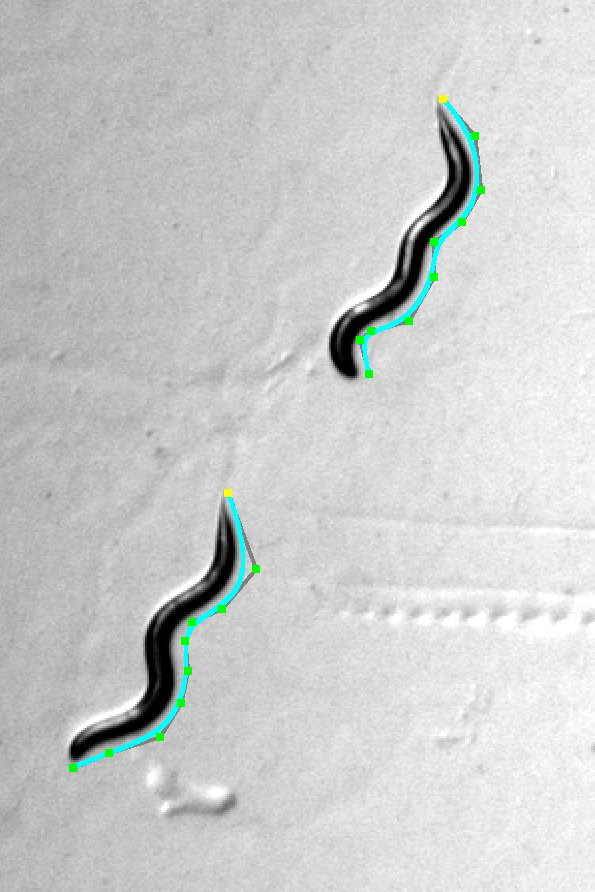

In [11]:
sample = samples['mt']

sample_dir = data_dir / sample["dataset_type"] / sample["color_type"]

results_dir = sample_dir / "Results"
results_dir.mkdir(exist_ok=True)

fname = sample_dir / sample['name']
kappa_path = fname.with_suffix(".kapp")
assert fname.exists() and kappa_path.exists()

frame = KappaFrame(ij.context)
frame.getKappaMenubar().openImageFile(str(fname))
frame.resetCurves()
frame.drawImageOverlay()

# Save screenshot
screenshot_path = results_dir / f"{fname.stem}_1_Image.png"
save(frame, fname=screenshot_path)

frame.getKappaMenubar().loadCurveFile(str(kappa_path))
frame.getCurves().setAllSelected()

# Set line thickness
frame.setBaseStrokeThickness(sample['line_thickness'])

# Set zoom
frame.controlPanel.getScaleSlider().setValue(sample['zoom'])
frame.drawImageOverlay()

# Save screenshot
screenshot_path = results_dir / f"{fname.stem}_2_Initial.png"
save(frame, fname=screenshot_path)

show(frame)

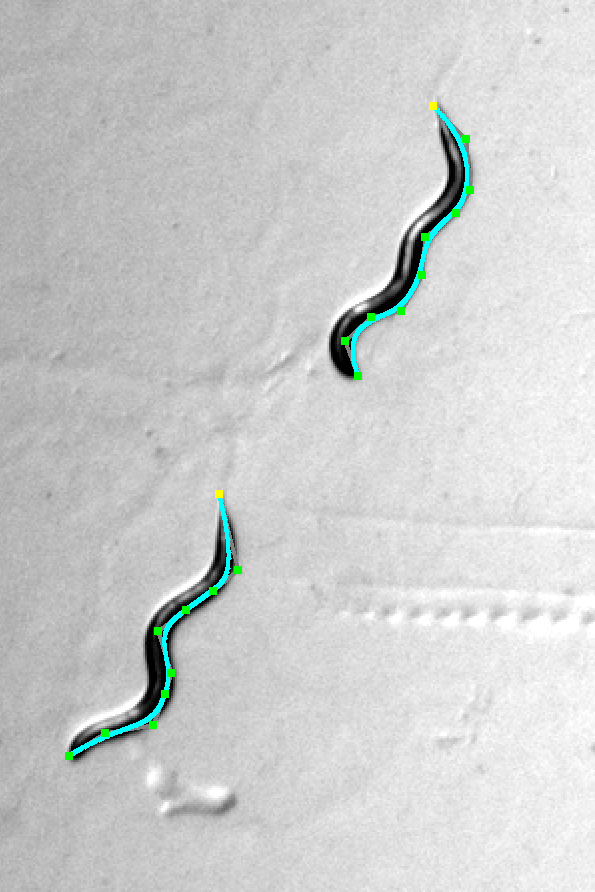

In [12]:
# Show thresholded data contours and pixels
frame.infoPanel.getShowRadiusCheckBox().setSelected(True)
frame.infoPanel.getShowDatapointsCheckBox().setSelected(True)

# Set radius for the thresold
frame.infoPanel.getThresholdRadiusSpinner().setValue(sample['threshold_radius'])

# Set pixels to dark or not
frame.infoPanel.getDataRangeComboBox().setSelectedIndex(1 if sample['is_signal_dark'] else 0)

# Set thresold value
frame.getInfoPanel().thresholdSlider.setValue(sample['threshold_value'])

frame.drawImageOverlay()

# Save screenshot
screenshot_path = results_dir / f"{fname.stem}_3_Threshold.png"
save(frame, fname=screenshot_path)

if sample['adjust_ctrl_point']:
    frame.setEnableCtrlPtAdjustment(True)
else:
    frame.setEnableCtrlPtAdjustment(False)
    
frame.fitCurves()
frame.infoPanel.getShowRadiusCheckBox().setSelected(False)
frame.infoPanel.getShowDatapointsCheckBox().setSelected(False)
frame.drawImageOverlay()

# Save screenshot
screenshot_path = results_dir / f"{fname.stem}_4_Final.png"
save(frame, fname=screenshot_path)

show(frame)

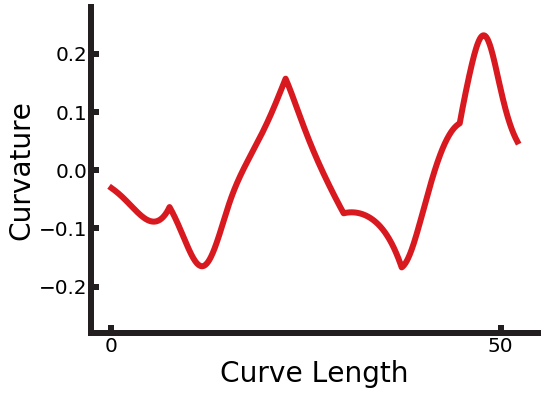

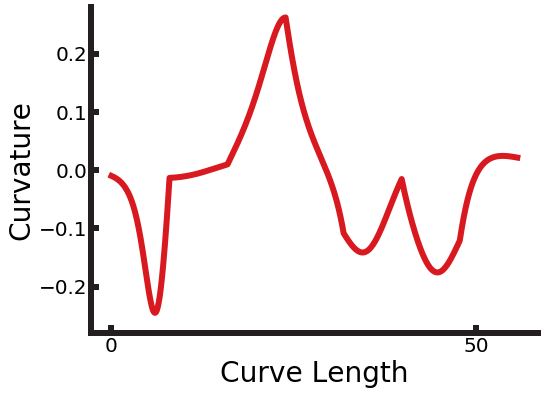

In [13]:
# Save curvature values
frame.getCurves().setAllSelected()
exporter = CurvesExporter(frame)
curvature_path = sample_dir / f"{fname.stem}_Curvatures.csv"
exporter.exportToFile(str(curvature_path), False)

# plot curvature values
curvatures = pd.read_csv(curvature_path)

curvatures['y_data'] = curvatures['Point Curvature (um-1)'] * curvatures['Point Curvature Sign']

#plt.ioff()
for curve_name, curvature in curvatures.groupby('Curve Name'):
  fig, ax = plt.subplots(figsize=(8, 6))

  y_data = curvature['y_data']
  n_points = len(y_data)

  assert len(curvature['Curve Length (um)'].unique()) == 1
  curve_length = curvature['Curve Length (um)'].unique()[0]

  x_data = np.linspace(0, curve_length, n_points)

  ax.plot(x_data, y_data, color="#d81920ff", lw=6)

  ax.set_xticks(np.arange(0, x_data.max(), 50))
  ax.set_yticks(sample['curvature_ticks'])  
  ax.set_ylim(*sample['curvature_lim'])

  kwargs = dict(font="DejaVu Sans", font_size_ratio=1, axes_color="#231f20ff",
                x_axis_grid=False, y_axis_grid=False, tick_width=6)
  pykappa.mpl.set_ax_style(ax, **kwargs)

  ax.set_ylabel("Curvature", fontsize=28)
  ax.set_xlabel("Curve Length", fontsize=28)
  
  tick_length = 8
  tick_width = 6
  ax.xaxis.set_tick_params(length=tick_length, width=tick_width, labelsize=20)
  ax.yaxis.set_tick_params(length=tick_length, width=tick_width, labelsize=20)

  plot_path = results_dir / f"{fname.stem}_5_Curvatures_{curve_name}.png"
  fig.savefig(plot_path, dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)
  #plt.clf()
  
#plt.ion()

# Run on all examples

In [ ]:
for name, sample in tqdm(samples.items(), total=len(samples)):
  print(name)
  process_example(sample, data_dir, ij)

mt
